# Import packages

In [3]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix



## Import Dataset

In [156]:
training_data = pd.read_csv('C:/Users/Admin/Documents/MVC/Cursos/PG Applied AI & ML/03. Supervised ML/Group_Assignment/case_8_games_training.csv')

In [146]:
training_data.head()

,app_id,average,mediantime,owners,players,price,date,action,adventure,anime,...,treyarch,tripwireinteractive,ubisoftdev,valvedev,metascore,userscore,positive,negative,original,dummy
0,10,661.0,74.0,12656037,368822.0,9.99,01/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,66949.0,1490.0,01/09/2016,0
1,10,690.0,71.0,12617378,363721.0,9.99,02/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,66989.0,1489.0,02/09/2016,0
2,10,681.0,74.0,12570654,358609.0,9.99,03/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,67033.0,1491.0,03/09/2016,0
3,10,656.0,72.0,12507511,356800.0,9.99,04/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,67087.0,1493.0,04/09/2016,0
4,10,588.0,71.0,12524101,360397.0,9.99,05/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,67137.0,1495.0,05/09/2016,0


In [147]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220923 entries, 0 to 220922
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   app_id                 220923 non-null  int64  
 1   average                134839 non-null  float64
 2   mediantime             134839 non-null  float64
 3   owners                 220923 non-null  int64  
 4   players                134839 non-null  float64
 5   price                  188148 non-null  float64
 6   date                   220923 non-null  object 
 7   action                 220923 non-null  int64  
 8   adventure              220923 non-null  int64  
 9   anime                  220923 non-null  int64  
 10  casual                 220923 non-null  int64  
 11  earlyaccess            220923 non-null  int64  
 12  freetoplay             220923 non-null  int64  
 13  indie                  220923 non-null  int64  
 14  multiplayer            220923 non-nu

In [148]:
training_data.describe()

,app_id,average,mediantime,owners,players,price,action,adventure,anime,casual,...,thecreativeassembly,treyarch,tripwireinteractive,ubisoftdev,valvedev,metascore,userscore,positive,negative,dummy
count,220923.000000,134839.000000,134839.000000,2.209230e+05,1.348390e+05,188148.000000,220923.000000,220923.000000,220923.000000,220923.000000,...,220923.000000,220923.000000,220923.000000,220923.000000,220923.000000,42236.000000,195179.000000,1.951790e+05,195179.000000,220923.0
mean,299663.635769,200.269017,183.275247,2.249986e+05,1.310701e+04,10.371443,0.407907,0.315132,0.048166,0.251613,...,0.000136,0.001086,0.000272,0.003531,0.002852,72.734255,73.117651,1.483184e+03,257.044759,0.0
std,141529.582621,481.524754,550.143061,1.520186e+06,2.030210e+05,9.453715,0.491447,0.464570,0.214118,0.433941,...,0.011652,0.032942,0.016478,0.059314,0.053325,10.920140,19.983056,1.933221e+04,1969.491754,0.0
min,10.000000,1.000000,1.000000,4.650000e+02,4.650000e+02,0.190000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000e+00,0.000000,0.0
25%,239090.000000,30.000000,26.000000,3.861000e+03,5.330000e+02,4.990000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,62.000000,1.900000e+01,6.000000,0.0
50%,332800.000000,103.000000,80.000000,1.788900e+04,1.018000e+03,8.990000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,77.000000,6.900000e+01,24.000000,0.0
75%,401810.000000,211.000000,176.000000,9.652500e+04,2.806000e+03,12.990000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,89.000000,3.290000e+02,98.000000,0.0
max,511380.000000,19979.000000,20082.000000,8.308348e+07,1.135156e+07,300.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,96.000000,100.000000,1.340212e+06,108025.000000,0.0


In [157]:
#Check missing values
missing_values = training_data.isna().sum()
missing_valuesnot0 = missing_values[missing_values > 0]
print(missing_valuesnot0)

average        86084
mediantime     86084
players        86084
price          32775
metascore     178687
userscore      25744
positive       25744
negative       25744
original       25744
dtype: int64


## Exploratory Data Analysis

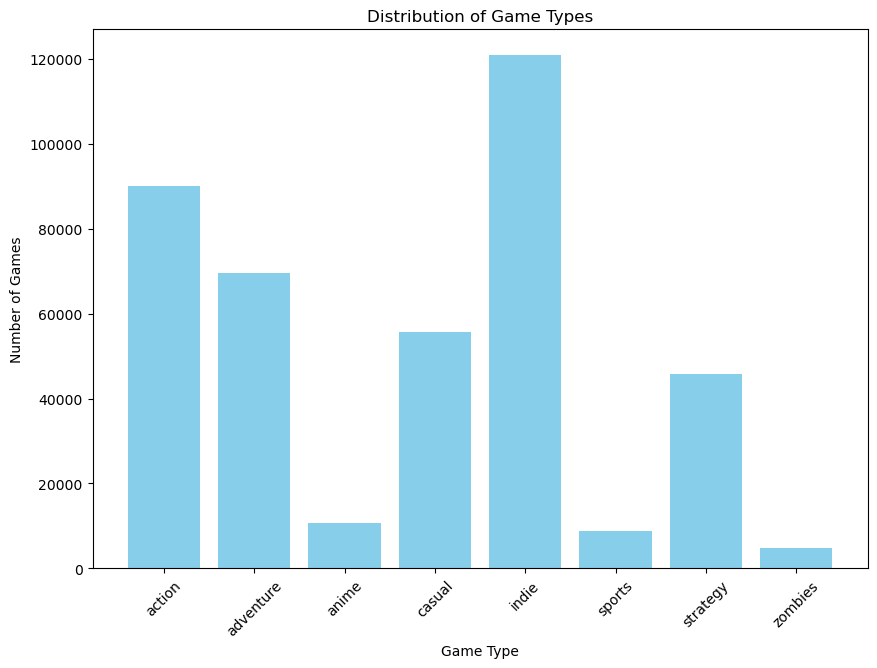

In [149]:
#Game Type Analysis
genre_counts = training_data[['action', 'adventure', 'anime', 'casual', 'indie', 'sports', 'strategy', 'zombies']].sum()

plt.figure(figsize=(10, 7))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.xlabel('Game Type')
plt.ylabel('Number of Games')
plt.title('Distribution of Game Types')
plt.xticks(rotation=45)
plt.show()

In [151]:
#Publisher Analysis
publisher_counts = training_data[['activision', 'bethesdasoftworks', 'electronicarts', 'rockstargames', 'sega', 'squareenix', 'thqnordic', 
                       'telltalegames', 'valve', 'warnerbros', 'bioware', 'capcom', 'cdprojektred', 'dice', 'firaxisgames', 
                       'gearboxsoftware', 'iointeractive', 'lucasarts', 'mumbojumbo', 'obsidianentertainment', 'relicentertainment', 
                       'squareenixdev', 'telltalegamesdev', 'thecreativeassembly', 'treyarch', 'tripwireinteractive', 'ubisoftdev', 
                       'valvedev']].sum()

# Top 10 publishers
top_10_publishers = publisher_counts.nlargest(10)
print(top_10_publishers)

#plt.figure(figsize=(15, 10))
#plt.bar(publisher_counts.index, publisher_counts.values, color='skyblue')
#plt.xlabel('Publisher')
#plt.ylabel('Number of Games')
#plt.title('Distribution of Games by Publisher')
#plt.xticks(rotation=90)
#plt.show()


thqnordic           1831
squareenix          1803
sega                1797
activision          1710
telltalegamesdev    1230
telltalegames       1200
electronicarts       960
squareenixdev        840
ubisoftdev           780
valve                720
dtype: int64


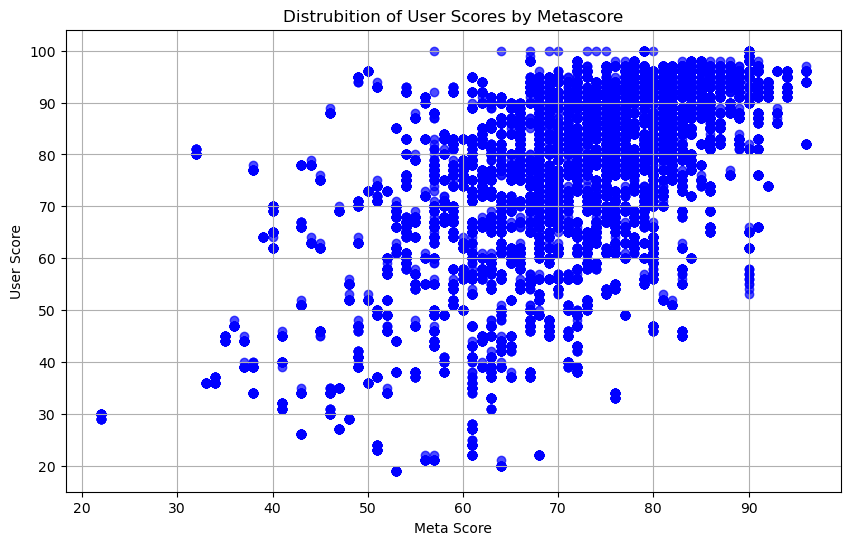

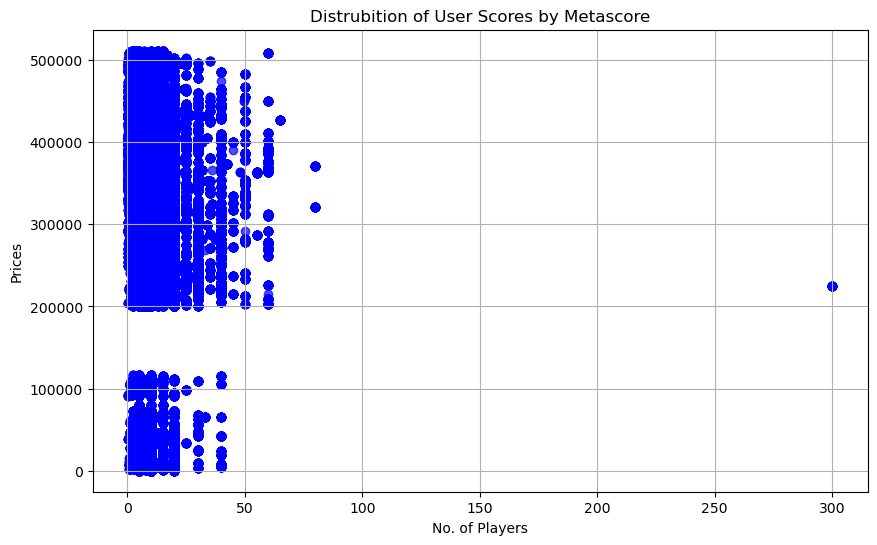

In [152]:
#Distrubition of User Scores by Metascore
plt.figure(figsize=(10, 6))
plt.scatter(training_data['metascore'], training_data['userscore'], alpha=0.7, c='b')
plt.xlabel('Meta Score')
plt.ylabel('User Score')
plt.title('Distrubition of User Scores by Metascore')
plt.grid(True)
plt.show()

#Distrubition of Players by Price
plt.figure(figsize=(10, 6))
plt.scatter(training_data['price'], training_data['app_id'], alpha=0.7, c='b')
plt.xlabel('No. of Players')
plt.ylabel('Prices')
plt.title('Distrubition of User Scores by Metascore')
plt.grid(True)
plt.show()


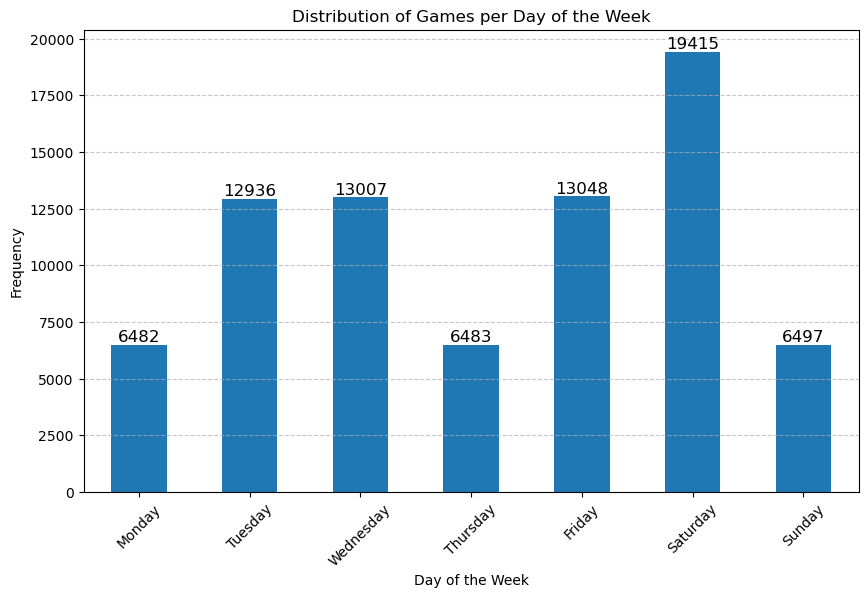

In [158]:
#Distribution of Games per Day of the Week 
training_data['original'] = pd.to_datetime(training_data['original'], errors='coerce')

training_data.dropna(subset=['original'], inplace=True)

training_data['day_of_week'] = training_data['original'].dt.day_name()

day_counts = training_data['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)

plt.figure(figsize=(10, 6))
bars = day_counts.plot(kind='bar')
for bar in bars.patches:# Add text annotations on top of each bar
    bars.annotate(f'{bar.get_height()}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=12, color='black')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Distribution of Games per Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [154]:
# Select covariates
independent_vars = ['owners', 'players', 'price', 'metascore', 'userscore', 'positive', 'negative', 'original', 'earlyaccess', 'freetoplay', 'multiplayer', 'openworld', 'action', 'adventure', 'anime', 'casual', 'indie', 'sports', 'strategy', 'zombies', 'activision', 'bethesdasoftworks', 'electronicarts', 'rockstargames', 'sega', 'squareenix', 'thqnordic', 
                       'telltalegames', 'valve', 'warnerbros', 'bioware', 'capcom', 'cdprojektred', 'dice', 'firaxisgames', 
                       'gearboxsoftware', 'iointeractive', 'lucasarts', 'mumbojumbo', 'obsidianentertainment', 'relicentertainment', 
                       'squareenixdev', 'telltalegamesdev', 'thecreativeassembly', 'treyarch', 'tripwireinteractive', 'ubisoftdev', 
                       'valvedev']
average_corr = training_data[independent_vars].corrwith(training_data['average'])

print('Zero-order correlation with dependent variable:')

display(average_corr)


Zero-order correlation with dependent variable:


owners                   0.070300
players                  0.066107
price                    0.165447
metascore                0.086027
userscore               -0.005064
positive                 0.058387
negative                 0.074132
original                -0.023484
earlyaccess             -0.016609
freetoplay               0.060925
multiplayer              0.021635
openworld                0.056794
action                  -0.080613
adventure               -0.026389
anime                    0.006421
casual                  -0.044254
indie                   -0.092814
sports                   0.017481
strategy                 0.096889
zombies                  0.013657
activision               0.003917
bethesdasoftworks        0.014588
electronicarts           0.008132
rockstargames            0.017775
sega                     0.025744
squareenix               0.016797
thqnordic                0.009339
telltalegames            0.021179
valve                    0.028037
warnerbros    

## Data cleaning and transformation

Missing Values

In [155]:
#Check missing values
missing_values = training_data.isna().sum()
missing_valuesnot0 = missing_values[missing_values > 0]
print(missing_valuesnot0)

#Ao remover os do Original, removi tbm os positive/negative/userscore

average       28283
mediantime    28283
players       28283
price          5629
metascore     61765
dtype: int64


## Model selection and training